# **Year wise Published Research Papers**

/tmp/ipython-input-3738035742.py:80: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


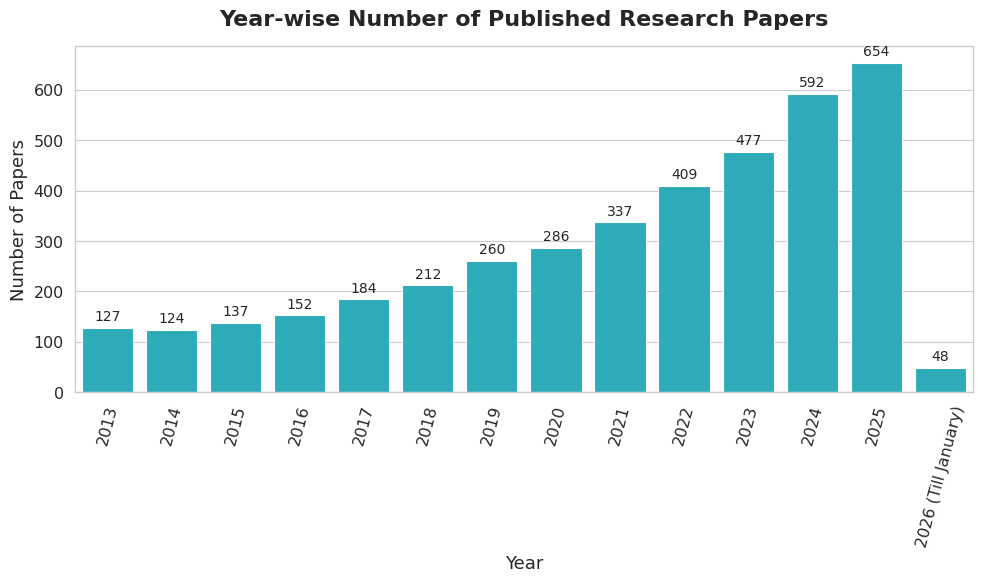

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# Data
# -----------------------------
data = {
    "Year": [
        2013, 2014, 2015, 2016, 2017, 2018, 2019,
        2020, 2021, 2022, 2023, 2024, 2025, 2026
    ],
    "Number of Papers": [
        127, 124, 137, 152, 184, 212, 260,
        286, 337, 409, 477, 592, 654, 48
    ]
}

df = pd.DataFrame(data)

# -----------------------------
# Seaborn theme (journal style)
# -----------------------------
sns.set_theme(
    style="whitegrid",
    context="paper",
    font_scale=1.3
)

# Colorblind-friendly palette
palette = sns.color_palette('tab10')

# -----------------------------
# Figure
# -----------------------------
plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=df,
    x="Year",
    y="Number of Papers",
    color=palette[9],
    edgecolor="white"
)

# -----------------------------
# Titles and labels
# -----------------------------
ax.set_title(
    "Year-wise Number of Published Research Papers",
    fontsize=16,
    fontweight="bold",
    pad=15
)

ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("Number of Papers", fontsize=13)

# -----------------------------
# Rotate x-axis labels
# -----------------------------
plt.xticks(rotation=75)

# -----------------------------
# Annotate bars
# -----------------------------
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%d",
        fontsize=10,
        padding=3
    )

# -----------------------------
# Layout and save
# -----------------------------

new_labels = [str(year) for year in df["Year"][:-1]] + ["2026 (Till January)"]
ax.set_xticklabels(new_labels)

plt.tight_layout()

plt.savefig(
    "year_wise_publications_seaborn.png",
    dpi=1200,
    bbox_inches="tight"
)


plt.show()


# **Percentage of Papers**

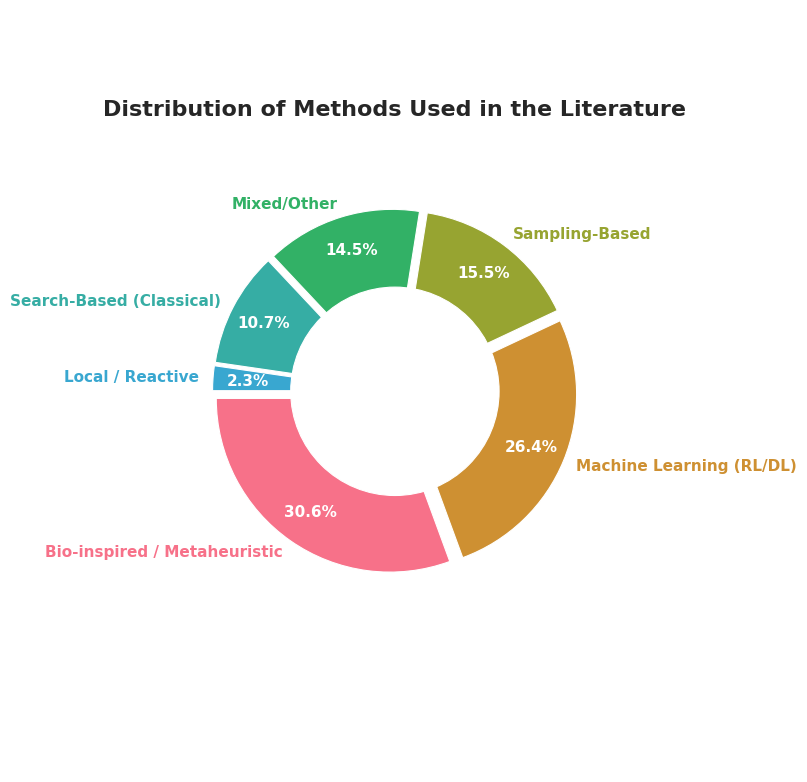

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------
# Data
# -----------------------------
data = {
    "Category": [
        "Bio-inspired / Metaheuristic",
        "Machine Learning (RL/DL)",
        "Sampling-Based",
        "Mixed/Other",
        "Search-Based (Classical)",
        "Local / Reactive"

    ],
    "Count": [2599, 2242, 1317, 1232, 909, 195]
}

df = pd.DataFrame(data)

# -----------------------------
# Seaborn theme
# -----------------------------
sns.set_theme(style="white", context="paper", font_scale=1.3)

# Soft, categorical, colorblind-safe palette
colors = sns.color_palette("husl", 8)

# -----------------------------
# Figure
# -----------------------------
fig, ax = plt.subplots(figsize=(8, 8))

# 👉 Create spacing between donut slices
explode = [0.05] * len(df)

wedges, texts, autotexts = ax.pie(
    df["Count"],
    labels=df["Category"],
    colors=colors,
    explode=explode,
    autopct="%1.1f%%",
    startangle=180,
    pctdistance=0.8,
    labeldistance=1.08,
    wedgeprops=dict(edgecolor="white", linewidth=0.8)
)

# -----------------------------
# Donut hole
# -----------------------------
centre_circle = plt.Circle((0, 0), 0.6, fc="white")
ax.add_artist(centre_circle)

# -----------------------------
# Percentage text: white & bold
# -----------------------------
for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(11)
    autotext.set_weight("bold")

# -----------------------------
# Category labels: match slice color
# -----------------------------
for text, wedge in zip(texts, wedges):
    text.set_color(wedge.get_facecolor())
    text.set_fontsize(11)
    text.set_weight("bold")

# -----------------------------
# Title
# -----------------------------
ax.set_title(
    "Distribution of Methods Used in the Literature",
    fontsize=16,
    fontweight="bold",
    y=0.85
)

ax.axis("equal")

# -----------------------------
# Save
# -----------------------------
plt.tight_layout()
plt.savefig(
    "method_distribution_donut_chart_refined.png",
    dpi=1200,
    bbox_inches="tight"
)
plt.show()


# **Algorithm Suitability**

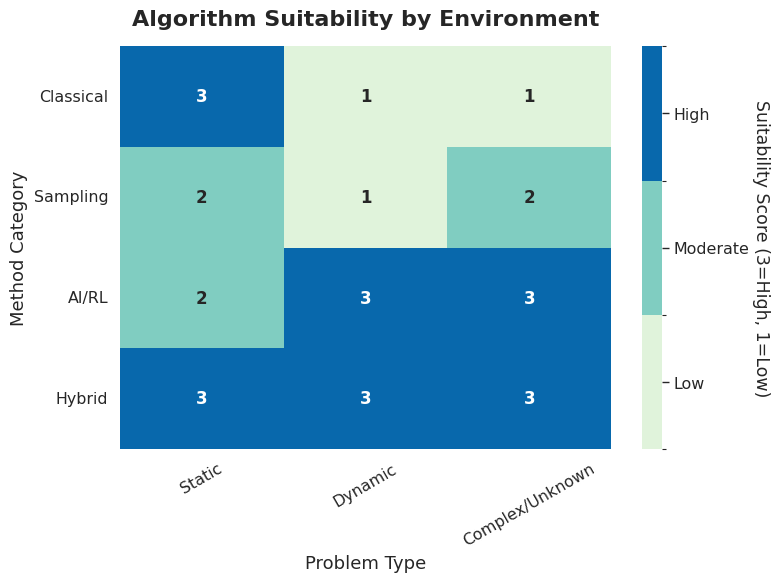

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# -----------------------------
# Data
# -----------------------------
data = {
    "Static": [3, 2, 2, 3],
    "Dynamic": [1, 1, 3, 3],
    "Complex/Unknown": [1, 2, 3, 3]
}
index = ["Classical", "Sampling", "AI/RL", "Hybrid"]
df = pd.DataFrame(data, index=index)

# -----------------------------
# Discrete colormap (like your example)
# -----------------------------
colors = ["#e0f3db", "#80cdc1", "#0868ac"]  # light → medium → dark
cmap = ListedColormap(colors)
bounds = [0.5, 1.5, 2.5, 3.5]  # boundaries between 1,2,3
norm = BoundaryNorm(bounds, cmap.N)

# -----------------------------
# Create figure
# -----------------------------
plt.figure(figsize=(8,6))
ax = sns.heatmap(
    df,
    annot=True,
    fmt="d",
    cmap=cmap,
    norm=norm,
    cbar=True,
    linewidths=0,   # no cell edges
    linecolor="white",
    square=False,
    annot_kws={"weight": "bold", "size": 12}
)

# -----------------------------
# Customize colorbar
# -----------------------------
cbar = ax.collections[0].colorbar
cbar.set_ticks([1, 2, 3])
cbar.set_ticklabels(["Low", "Moderate", "High"])
cbar.set_label("Suitability Score (3=High, 1=Low)", rotation=270, labelpad=15)

# -----------------------------
# Labels and title
# -----------------------------
ax.set_title("Algorithm Suitability by Environment", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Problem Type", fontsize=13)
ax.set_ylabel("Method Category", fontsize=13)

plt.xticks(rotation=30)
plt.yticks(rotation=0)

# -----------------------------
# Save figure
# -----------------------------
plt.tight_layout()
plt.savefig("heatmap_like_example.png", dpi=1200, bbox_inches="tight")
plt.show()


# **Algorithm Multi criteria comparison**



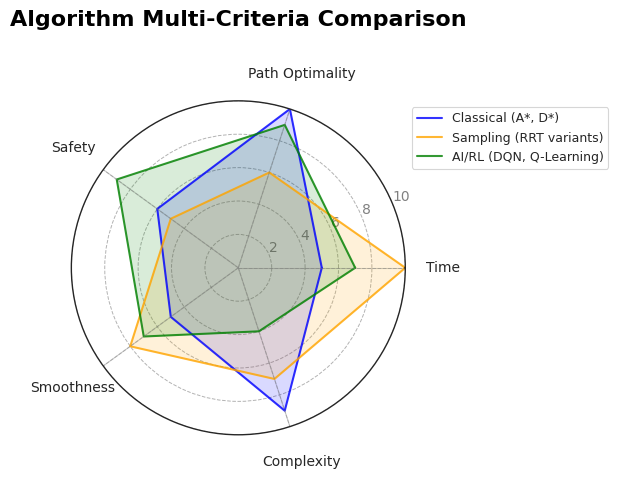

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Data
# -------------------------------
categories = ['Time', 'Path Optimality', 'Safety', 'Smoothness', 'Complexity']
N = len(categories)

data = {
    "Classical (A*, D*)": [5, 10, 6, 5, 9],
    "Sampling (RRT variants)": [10, 6, 5, 8, 7],
    "AI/RL (DQN, Q-Learning)": [7, 9, 9, 7, 4]
}

# Compute angles for radar axes
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# -------------------------------
# Figure setup
# -------------------------------
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))

# Colors for each algorithm
colors = ['blue', 'orange', 'green']

# -------------------------------
# Plot each algorithm
# -------------------------------
for idx, (algo, values) in enumerate(data.items()):
    values += values[:1]  # close the loop
    ax.plot(angles, values, color=colors[idx], linewidth=1.5, label=algo, alpha=0.8)
    ax.fill(angles, values, color=colors[idx], alpha=0.15)

# -------------------------------
# Styling
# -------------------------------
# Category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
ax.tick_params(axis='x', pad=15)

# Concentric circles (radial grid) for scale reference
ax.yaxis.grid(True, color='gray', linestyle='--', linewidth=0.7, alpha=0.6)

# Radial ticks
ax.set_yticks([2,4,6,8,10])
ax.set_yticklabels(['2','4','6','8','10'], fontsize=10, color='gray')

# Draw radial lines (spokes)
for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 10], color='gray', linewidth=0.7, linestyle='--', alpha=0.5)

# Set y-axis limit
ax.set_ylim(0, 10)

# Title and legend
plt.title("Algorithm Multi-Criteria Comparison", size=16, fontweight='bold', color='black', y=1.2)
plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=9)

# Save the figure as PNG (or any format you like)
plt.tight_layout()
plt.savefig("radar_chart.png", dpi=1200, bbox_inches='tight')  # high-res, tight layout

plt.show()

